## 3. Trend of Domestic Flights
### Questions to answer
- Monthly trend
- Yearly trend
- Price category trend

Import libraries and loaded data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\10_SFO_airtraffic\workingsheet.csv')

sns.set_style('ticks')

df['date']=pd.to_datetime(df['Activity Period Start Date'])
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

Filtered dataframe to focus on Domestic flights

In [2]:
df_US = df[df['GEO Summary']=='Domestic']

####  Monthly trend
Calculated average passenger count per month and displayed using a line chart

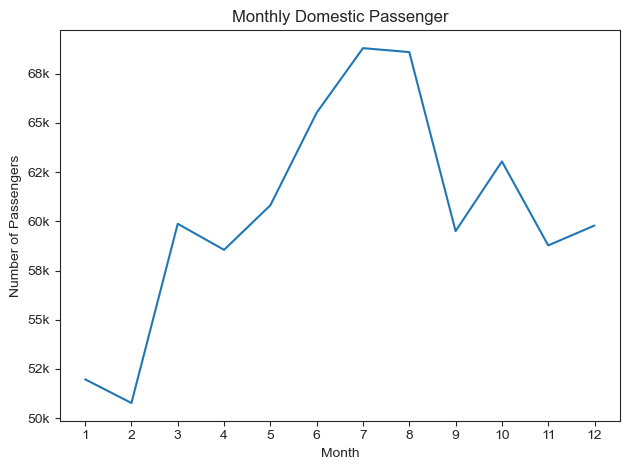

In [3]:
df_US.groupby('month')['Passenger Count'].mean().plot()

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.title('Monthly Domestic Passenger')
plt.ylabel('Number of Passengers')
plt.xlabel('Month')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(14))
plt.tight_layout()
plt.show()


- Domestic flights also depends on season, as showing high traffic nearly 70k, during summer and low during beginning of the year as 50k.

#### Yearly trend
Calculate total number of passengers for each year and visualized with a line chart

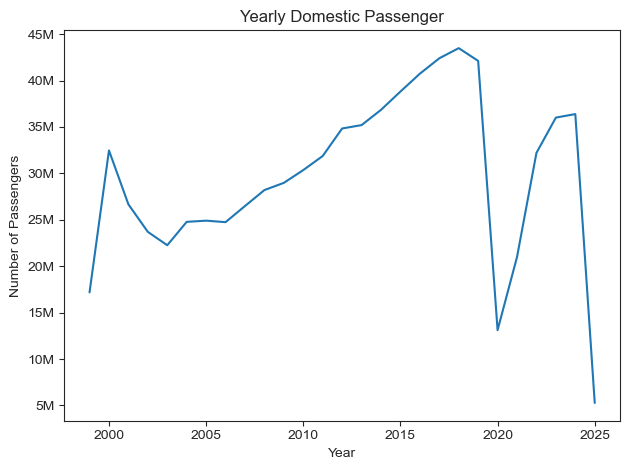

In [4]:
df_US.groupby('year')['Passenger Count'].sum().plot()

plt.title('Yearly Domestic Passenger')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
plt.tight_layout()
plt.show()

- Domestic flight traffic has not fully recovered from the pandemic.

####  Price category trend

Created a new Dataframe using pivot_table, changed yearly passenger number to percentage to see a distribution.

In [5]:
df_US_low = df_US.pivot_table(index='year',values='Passenger Count', aggfunc='sum', columns='Price Category Code')
df_US_low.loc[:,'sum']=df_US_low.sum(axis=1)
df_US_low['Low Fare']= df_US_low['Low Fare'].div(df_US_low['sum']/100)
df_US_low['Other']= df_US_low['Other'].div(df_US_low['sum']/100)
df_US_low.drop('sum',axis=1,inplace=True)
df_US_low

Price Category Code,Low Fare,Other
year,,
1999,7.078659,92.921341
2000,7.842446,92.157554
2001,6.734239,93.265761
2002,7.045901,92.954099
2003,9.096855,90.903145
2004,13.204042,86.795958
2005,14.364272,85.635728
2006,13.053769,86.946231
2007,14.804036,85.195964


Display percentage using a stacked horizontal bar chart to see distribution of low-fare flights vs non-low-far flights.

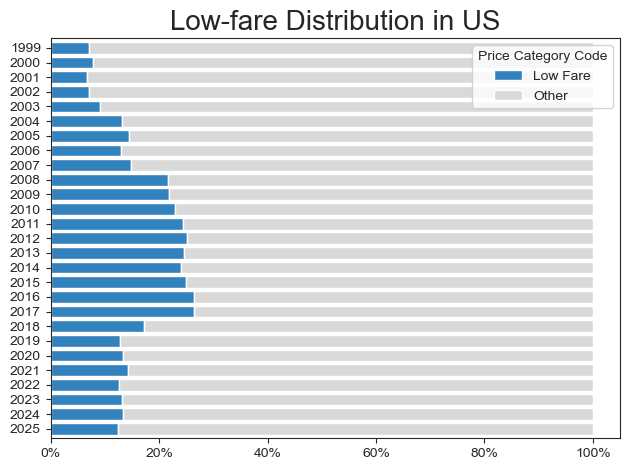

In [6]:
df_US_low.plot(kind='barh', stacked=True, colormap='tab20c',width=0.8)
plt.gca().invert_yaxis()
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.title('Low-fare Distribution in US',fontsize=20)

plt.tight_layout()
plt.show()

- Low-fare usage had been growing till 2017, considering most low-fare is domestic flights.
- Also has not been able to recover from the pandemic.